In [1]:
import os
import sys
import aoai

In [2]:
DATA_DESCRIPTION  = os.path.join(aoai.BASE_DIR, 'dataset', "movie-genre-data", "description.txt")
TEST_DATA = os.path.join(aoai.BASE_DIR, 'dataset', "movie-genre-data", "test_data.txt")
TRAIN_DATA = os.path.join(aoai.BASE_DIR, 'dataset', "movie-genre-data", "train_data.txt")
TEST_DATA_SOLUTION = os.path.join(aoai.BASE_DIR, 'dataset', "movie-genre-data", "test_data_solution.txt")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [4]:
columns = ["id", "title", "genre", "description"]

In [5]:
df = pd.read_csv(TRAIN_DATA, sep=" ::: ", names=columns, header=None)

C:\Users\91930\AppData\Local\Temp\ipykernel_30516\2404244812.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(TRAIN_DATA, sep=" ::: ", names=columns, header=None)


In [6]:
df.index+=1

Dropping `id` column, from the data frame.

In [7]:
df = df.drop("id", axis=1)

In [8]:
df

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [9]:
df['genre'].isna().sum(), df['title'].isna().sum()

(0, 0)

Check any duplicate in `title`.

In [10]:
len(df['title'].unique()) == len(df['title'])

True

Counting number of movies in each genre.

In [11]:
df_genre_count = df['genre'].value_counts()
df_genre_values = df['genre'].unique()

In [12]:
df_genre_count, df_genre_values

(genre
 drama          13613
 documentary    13096
 comedy          7447
 short           5073
 horror          2204
 thriller        1591
 action          1315
 western         1032
 reality-tv       884
 family           784
 adventure        775
 music            731
 romance          672
 sci-fi           647
 adult            590
 crime            505
 animation        498
 sport            432
 talk-show        391
 fantasy          323
 mystery          319
 musical          277
 biography        265
 history          243
 game-show        194
 news             181
 war              132
 Name: count, dtype: int64,
 array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
        'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
        'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
        'family', 'mystery', 'history', 'news', 'biography', 'romance',
        'game-show', 'musical', 'war'], dtype=object))

In [13]:
genre_count_dict = {}
genres = list(df_genre_values)
for g in genres:
    genre_count_dict[g] = df_genre_count[g]

In [14]:
genre_count_dict

{'drama': 13613,
 'thriller': 1591,
 'adult': 590,
 'documentary': 13096,
 'comedy': 7447,
 'crime': 505,
 'reality-tv': 884,
 'horror': 2204,
 'sport': 432,
 'animation': 498,
 'action': 1315,
 'fantasy': 323,
 'short': 5073,
 'sci-fi': 647,
 'music': 731,
 'adventure': 775,
 'talk-show': 391,
 'western': 1032,
 'family': 784,
 'mystery': 319,
 'history': 243,
 'news': 181,
 'biography': 265,
 'romance': 672,
 'game-show': 194,
 'musical': 277,
 'war': 132}

In [15]:
def seperate_genre_count(genre: dict) -> tuple[list[str], list[int]]:
    names, values = [], []
    for k in genre.keys():
        names.append(k)
        values.append(genre[k])
    return names, values

In [16]:
genre_name, genre_count = seperate_genre_count(genre_count_dict)

Plotting the bar graph.

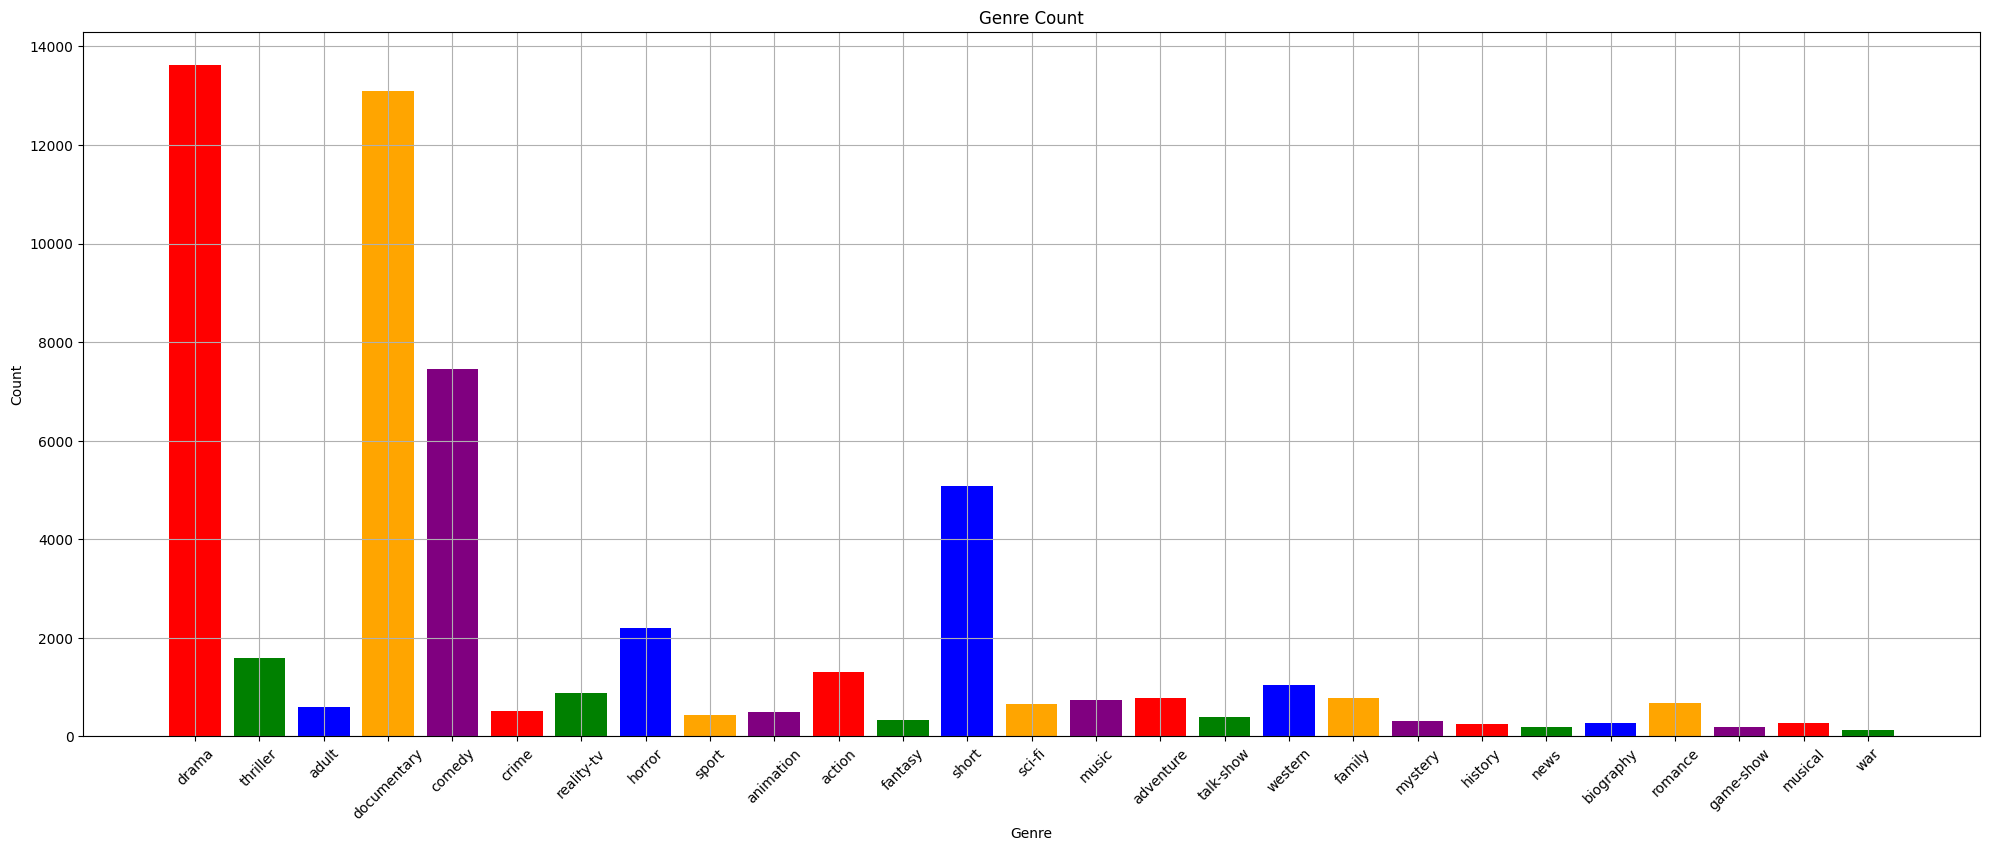

In [17]:
# fig, ax = plt.subplots(nrows=20, ncols=8)
# ax.bar(genre_name, genre_count)
# ax.set_ylabel("Total")
# ax.set_xlabel("Genre")
# ax.legend(title="Genre Count Graph")


plt.figure(figsize=(20, 8))
plt.bar(genre_name, genre_count, color=['red', 'green', 'blue', 'orange', 'purple'])
plt.title("Genre Count")
plt.xlabel("Genre")
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [18]:
highest = df_genre_count.idxmax()

print("The most watched genre is:", highest)


The most watched genre is: drama
